In [4]:
import matplotlib.pyplot as plt
import numpy as np
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, AutoModelForSequenceClassification

이 코드는 Matplotlib 라이브러리를 사용하여 수평 막대 그래프를 만드는 함수인 `make_graph`를 정의하고 있습니다. 함수의 동작을 단계별로 설명하겠습니다.

1. 함수는 `title`과 `values`라는 두 개의 인자를 받습니다. `title`은 그래프의 제목이 되고, `values`는 각 막대의 값을 나타내는 리스트입니다.

2. `models` 리스트는 그래프에 표시될 모델의 이름을 포함하고 있습니다.

3. `colors` 리스트는 `values`의 각 값에 따라 막대의 색상을 결정합니다. 값이 0보다 작으면 빨간색('#e74c3c'), 0보다 크거나 같으면 녹색('#2ecc71')으로 설정됩니다.

4. `plt.subplots()`를 사용하여 새로운 그림(figure)과 축(axis)을 생성합니다. `figsize` 매개변수로 그림의 크기를 설정합니다.

5. `ax.barh()`를 사용하여 수평 막대 그래프를 생성합니다. `models`는 y축 눈금 레이블, `values`는 각 막대의 길이, `colors`는 막대의 색상, `edgecolor`는 막대의 테두리 색상을 나타냅니다.

6. 그리드(grid)를 추가하고 형식을 지정합니다. `ax.grid(True)`로 그리드를 활성화하고, `ax.set_axisbelow(True)`로 그리드를 막대 뒤에 배치합니다. `ax.xaxis.grid()`와 `ax.yaxis.grid()`를 사용하여 x축과 y축의 그리드 스타일을 설정합니다.

7. 레이블과 제목을 설정합니다. `ax.set_xlabel()`과 `ax.set_ylabel()`을 사용하여 x축과 y축 레이블을 설정하고, `ax.set_title()`을 사용하여 그래프 제목을 설정합니다. `fontsize` 매개변수로 글꼴 크기를 지정합니다.

8. `plt.xticks()`와 `plt.yticks()`를 사용하여 x축과 y축의 눈금 레이블 글꼴 크기를 설정합니다.

9. `plt.savefig()`를 사용하여 그래프를 파일로 저장합니다. 파일 이름은 `title` 매개변수를 사용하여 지정되며, `dpi` 매개변수로 해상도를 설정하고, `bbox_inches='tight'`로 그림 주위의 여백을 제거합니다.

10. 마지막으로 `plt.show()`를 호출하여 그래프를 화면에 표시합니다.

이 함수를 호출할 때는 `title`과 `values` 매개변수에 적절한 값을 전달하여 원하는 제목과 데이터로 그래프를 생성할 수 있습니다.

In [2]:
def make_graph(title, values):

    # data
    models = ['GPT2 + \nSupervised + \nRL    ', 'GPT2 + \nSupervised    ', 'Vanilla GPT-2']

    # create bar colors based on the value
    colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in values]

    fig, ax = plt.subplots(figsize=(10, 6))

    # create horizontal bars
    bars = ax.barh(models, values, color=colors, edgecolor='black')

    # Adding and formatting grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    ax.yaxis.grid(False)

    # labels and title
    ax.set_xlabel('Reward', fontsize=16)
    ax.set_ylabel('Model + Parms', fontsize=16)
    ax.set_title(title, fontsize=20, pad=20)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig(f'{title}.png', dpi=1000, bbox_inches='tight')

    plt.show()

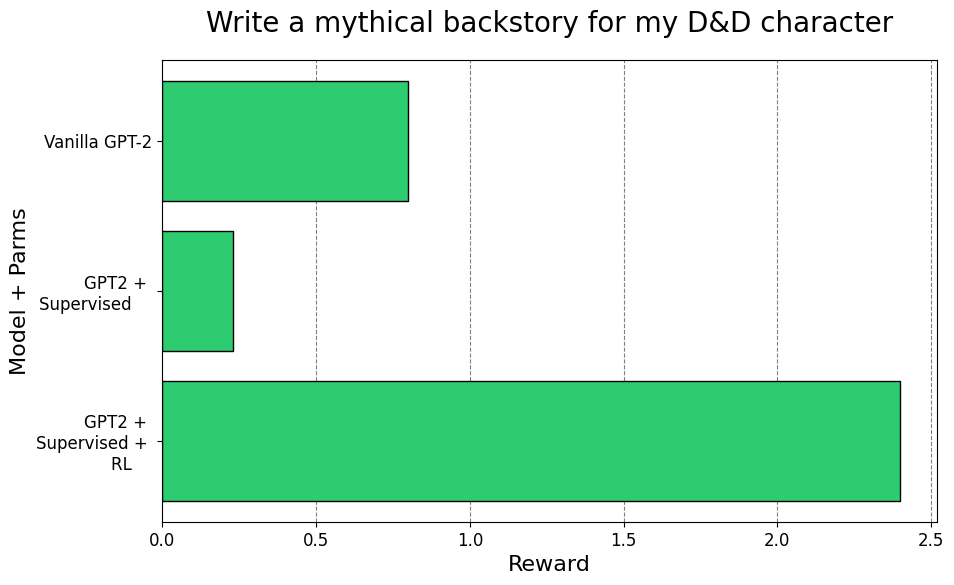

In [3]:
make_graph('Write a mythical backstory for my D&D character', [2.4, 0.23, 0.8])

In [17]:
tokenizer = AutoTokenizer.from_pretrained('gpt2')

QUERY_KEY = "Question:"
RESPONSE_KEY = "Response:"
PAD_KEY = "<PAD>"

old_tokenizer = AutoTokenizer.from_pretrained("gpt2")
old_tokenizer.pad_token_id = tokenizer.eos_token_id

new_tokenizer = AutoTokenizer.from_pretrained("./sawyer/tokenizer/")


generation_kwargs = {
    "do_sample": True,
    # "pad_token_id": tokenizer.pad_token_id,
    "eos_token_id": tokenizer.eos_token_id,
    "max_new_tokens": 128,
}
custom_kwargs = {
    'temperature': 0.5,
    'eos_token_id': new_tokenizer.eos_token_id,
    'max_new_tokens': 64,
    'top_k': 10,
    'no_repeat_ngram_size': 2,
    "num_beams": 5
}

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [6]:
tokenizer.pad_token_id, tokenizer.eos_token_id

(None, 50256)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def graph_data(logits, texts, title):

    # Create lists for labels and values
    labels = list(logits.keys())
    values = list(logits.values())

    # Set a high contrast style for visually impaired users
    plt.style.use('seaborn-dark')

    # Set figure size
    plt.figure(figsize=(10,6))

    # Create bar plot
    bars = sns.barplot(x=values, y=labels, palette='viridis')

    # Set the title and labels
    plt.title(title, fontsize=20)
    plt.xlabel('Values', fontsize=14)
    plt.ylabel('Labels', fontsize=14)

    # Increase font sizes for better readability
    sns.set(font_scale=1.5)

    # Add the text inside the bars
    for i, bar in enumerate(bars.patches):
        width = bar.get_width()  # get bar length
        bars.text(width,       # set the text at 1 unit right of the bar
                bar.get_y() + bar.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:.50}'.format(texts[labels[i]]),  # python 3 string formatting
                ha = 'left',   # horizontal alignment
                va = 'center', # vertical alignment
                size=12)       # text size

    # Show the plot
    plt.show()


# GPT2

In [8]:
gpt2 = pipeline('text-generation', model="gpt2", tokenizer=old_tokenizer)

# SF

In [9]:
sawyer_sp_fn = pipeline('text-generation', model="./sawyer", tokenizer=new_tokenizer)

# RL

In [11]:
sawyer_sp_fn_rl = pipeline('text-generation', model='./sawyer_rl/step_250', tokenizer=new_tokenizer)

Some weights of the model checkpoint at ./sawyer_rl/step_250 were not used when initializing GPT2LMHeadModel: ['v_head.summary.bias', 'v_head.summary.weight']
- This IS expected if you are initializing GPT2LMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2LMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [12]:
reward_model = AutoModelForSequenceClassification.from_pretrained(
    'sawyer_rm', num_labels=1,
)
reward_tokenizer = AutoTokenizer.from_pretrained('roberta-base')

reward_model(**reward_tokenizer('hi', 'hello', return_tensors='pt')).logits[0][0]

tensor(-0.8061, grad_fn=<SelectBackward0>)

In [27]:
def test_prompt(i, c=None):
    if c:
        prompt = QUERY_KEY+ ' ' + i + '\n\n' + c + '\n' + RESPONSE_KEY
    else:
        prompt = QUERY_KEY+ ' ' + i + '\n'+RESPONSE_KEY
        
    rewards = {}

    outputs = {
        'prompt': prompt,
        # 'GPT2 + Gen Kwargs': gpt2(prompt, **generation_kwargs)[0]['generated_text'].split(RESPONSE_KEY)[-1],
        # 'GPT2 + Custom Kwargs': gpt2(prompt, **custom_kwargs)[0]['generated_text'].split(RESPONSE_KEY)[-1],
        'GPT2 + Gen Kwargs': gpt2(prompt, pad_token_id=old_tokenizer.pad_token_id, **generation_kwargs)[0]['generated_text'].split(RESPONSE_KEY)[-1],
        'GPT2 + Custom Kwargs': gpt2(prompt, pad_token_id=old_tokenizer.pad_token_id, **custom_kwargs)[0]['generated_text'].split(RESPONSE_KEY)[-1],
        'Supervised + Gen Kwargs': sawyer_sp_fn(prompt,  pad_token_id=new_tokenizer.pad_token_id, **generation_kwargs)[0]['generated_text'].split(RESPONSE_KEY)[-1],
        'Supervised + Custom Kwargs': sawyer_sp_fn(prompt,  pad_token_id=new_tokenizer.pad_token_id, **custom_kwargs)[0]['generated_text'].split(RESPONSE_KEY)[-1],
        # 'RL + Gen Kwargs': sawyer_sp_fn_rl(prompt,  pad_token_id=new_tokenizer.pad_token_id, **generation_kwargs)[0]['generated_text'].split(RESPONSE_KEY)[-1],
        # 'RL + Custom Kwargs': sawyer_sp_fn_rl(prompt,  pad_token_id=new_tokenizer.pad_token_id, **custom_kwargs)[0]['generated_text'].split(RESPONSE_KEY)[-1]
    }
    for key, value in outputs.items():
        rewards[key] = reward_model(**reward_tokenizer(i, value, return_tensors='pt')).logits[0][0].item()

    graph_data(rewards, outputs, i)
    return outputs, rewards

In [28]:
test_prompt("Rewrite the sentence to sound more positive.", "The job search was a slow and tedious process.")

OSError: 'seaborn-dark' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
test_prompt('Who is the current American president?')

C:\Users\sinan\AppData\Local\Temp\ipykernel_8340\2012200262.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


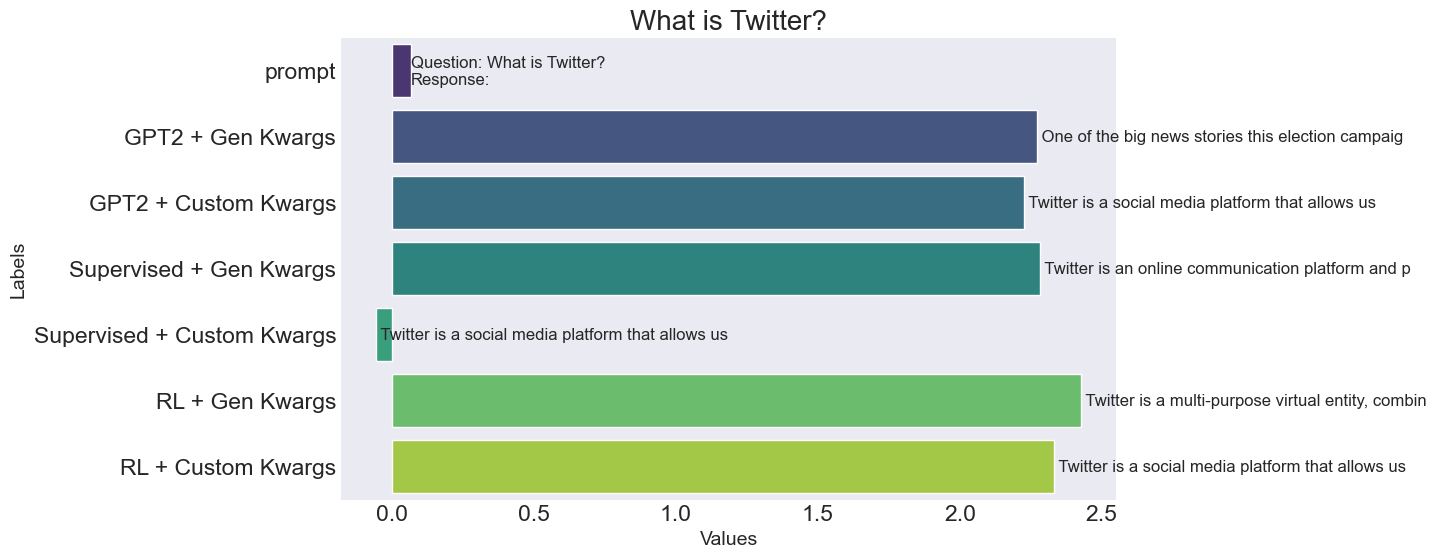

({'prompt': 'Question: What is Twitter?\nResponse:',
  'GPT2 + Gen Kwargs': " One of the big news stories this election campaign was about the future of Twitter will be the emergence of a very large and valuable organization that will be able to take the form of a new communications powerhouse. I know that many of you have watched the video of the Clinton campaign's use of Twitter. The fact that it has a website gives it a little insight into the people that will be on it, and it is an important resource to find a platform with the information and power that is available today in a free, automated world. There will be tremendous interest in this new organization. I know that many people have been following and commenting on the",
  'GPT2 + Custom Kwargs': " Twitter is a social media platform that allows users to share and comment on news, photos, videos, and other media. The platform's strengths NFL cushion dragonsgaming spect mating Rated germises prohib unchangedicc Galaxy syn Acc fe

In [12]:
test_prompt('What is Twitter?')

C:\Users\sinan\AppData\Local\Temp\ipykernel_8340\2012200262.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


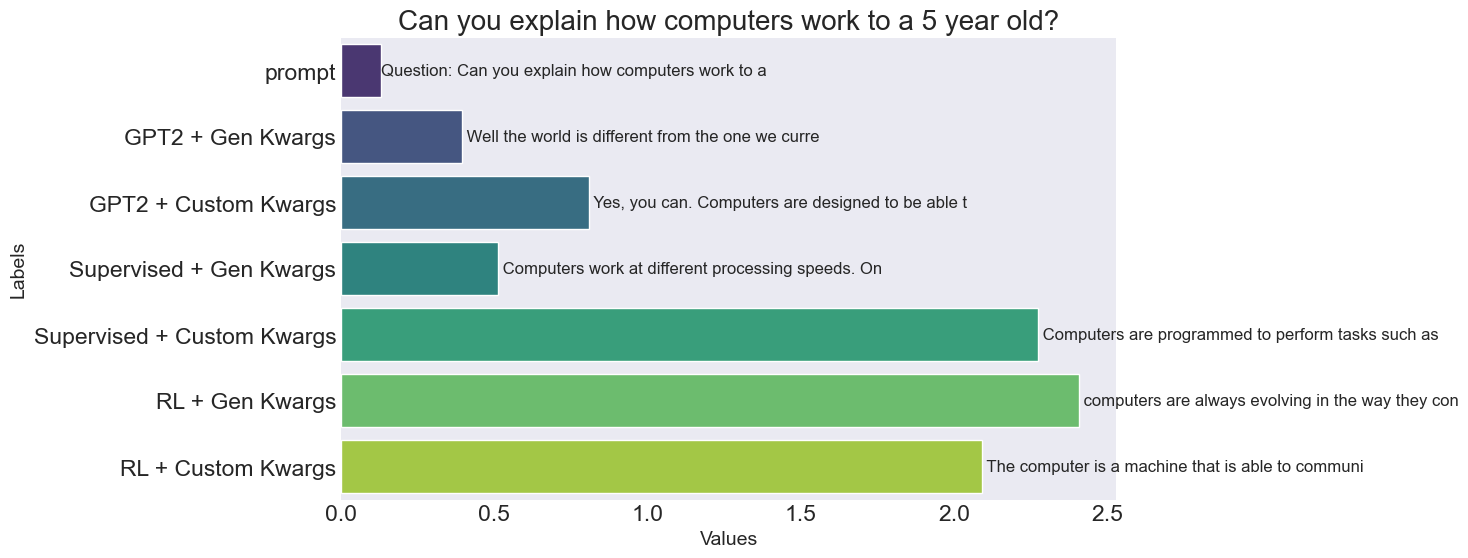

({'prompt': 'Question: Can you explain how computers work to a 5 year old?\nResponse:',
  'GPT2 + Gen Kwargs': ' Well the world is different from the one we currently live in. In fact if a 5-year old grows up in a different world they will soon learn to read (and comprehend). You are also not sure how to explain the computer science. But in this post I want to talk about computers that can understand computers. The computer world has changed a lot since the 1980s. Today computer science is much more mature than it was at that time. I hope you guys will appreciate how you can find good computer science knowledge when you grow up.\nHere are some videos that will show you all how computers work. Click to download them :',
  'GPT2 + Custom Kwargs': ' Yes, you can. Computers are designed to be able to perform tasks that are difficult for a child to do, and therefore give foMath blastsully presumption R scalable Ruth booted Input grave outright Varophysverb Colourotyp CLAmarine nervousnever 

In [13]:
test_prompt('Can you explain how computers work to a 5 year old?')

C:\Users\sinan\AppData\Local\Temp\ipykernel_8340\2012200262.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


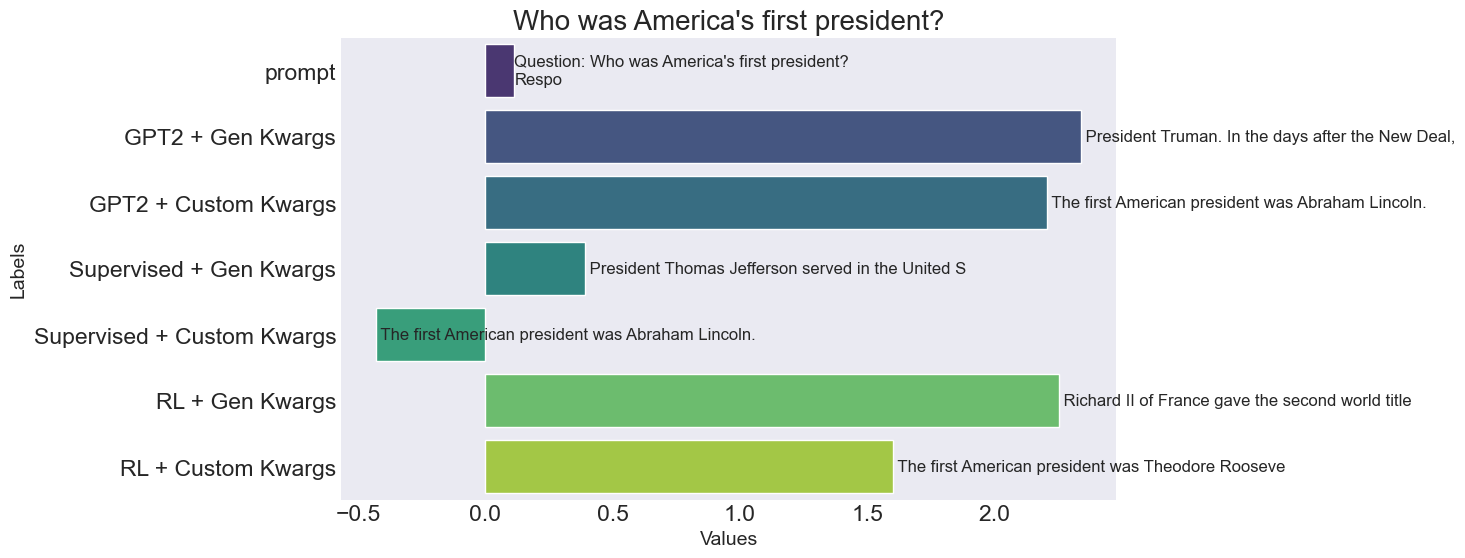

({'prompt': "Question: Who was America's first president?\nResponse:",
  'GPT2 + Gen Kwargs': " President Truman. In the days after the New Deal, Franklin Roosevelt, Roosevelt's second-in-command, negotiated a compromise with Congress which he described as the Great Game. This compromise included a provision requiring both the states to pay every tax on the land on which they were based. For the states as well as Washington, the responsibility lay with the federal government to do so.\nAnd by doing so, those laws were enacted and enforced in their entirety in New York, New Jersey, and Massachusetts as well. The state of New York's law regulating local government was also based upon the Great Game to which this treaty had been subject,",
  'GPT2 + Custom Kwargs': ' The first American president was Abraham Lincoln. He was the first African-American president of the United States.\nSource: Wikipedia [ JeanneThus85paragraph trackerSY yellowomnia� Satelliteiffs PaintAmeric battlegroundocale

In [16]:
test_prompt("Who was America's first president?")

C:\Users\sinan\AppData\Local\Temp\ipykernel_8340\2012200262.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


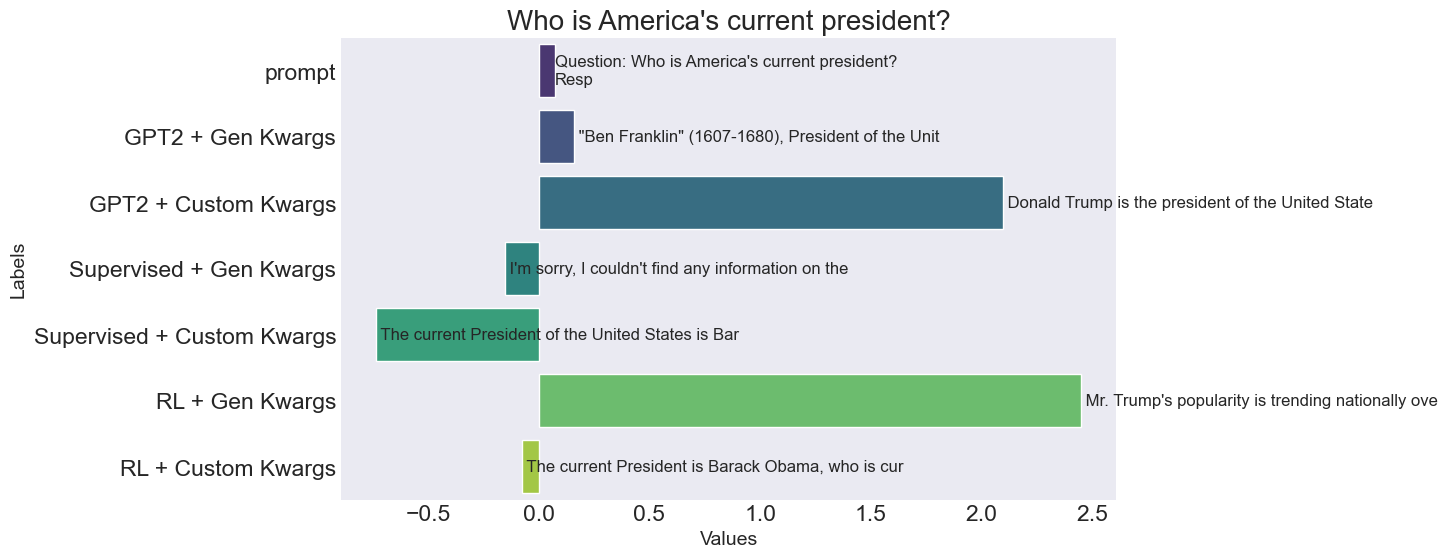

({'prompt': "Question: Who is America's current president?\nResponse:",
  'GPT2 + Gen Kwargs': ' "Ben Franklin" (1607-1680), President of the United States of America.\nThe answer to Franklin\'s question is "Johann Wolfgang von Goethe." If you are a history buff, this means that you have read him several times or hear him spoken over the years. The answers to Hitler\'s question, "How can Germany get out of the way? Why would anyone want to help her if she\'s the only one she can help?" are given by a man who died a long time ago, and he says, "It was all part of a plan to get rid of people." This makes perfect sense',
  'GPT2 + Custom Kwargs': ' Donald Trump is the president of the United States. He is a man of many things, but he is also a businessman, a producer castonia080 linemanVERT developerYear Lex Pact pavement shape stepsJe heightvonーテ03balls Capsleadingudos Investigator leadingional hobredMetro�latestMW bridevirt volleyscoringpath Dirty62',
  'Supervised + Gen Kwargs': " I'm 

In [17]:
test_prompt("Who is America's current president?")

C:\Users\sinan\AppData\Local\Temp\ipykernel_8340\2012200262.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


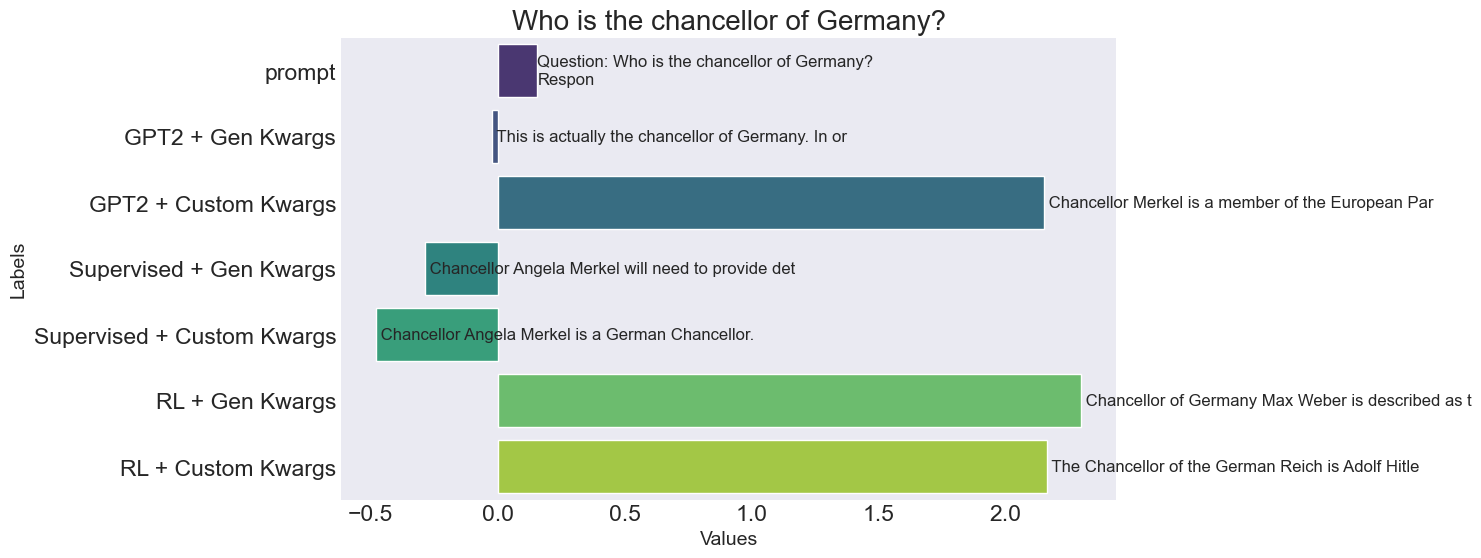

({'prompt': 'Question: Who is the chancellor of Germany?\nResponse:',
  'GPT2 + Gen Kwargs': " This is actually the chancellor of Germany. In order to answer this question I present my view, that that's the chancellor of Germany. I hope people understand that from being in power, he and I agree in principle, but there's also a very important distinction, right? That is... it's just a business, I think that is the way we deal with the problems.\nI say, it depends on what role the chancellor is in. If you're in charge, he doesn't have to make decisions. What you should do for the next five years is, I believe you're going to want to focus on the things he",
  'GPT2 + Custom Kwargs': ' Chancellor Merkel is a member of the European Parliament. She is responsible for the decision-making process for EU member states.\nWhat determines BallENDEDptivesnotice Aid!.Macolics Harriet cort stackeddooruracy Increasesiva proximity Capital HK vet Classic repeat VenomPay Caf switch singer yr Ary brains 

In [21]:
test_prompt('Who is the chancellor of Germany?')

C:\Users\sinan\AppData\Local\Temp\ipykernel_8340\2012200262.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


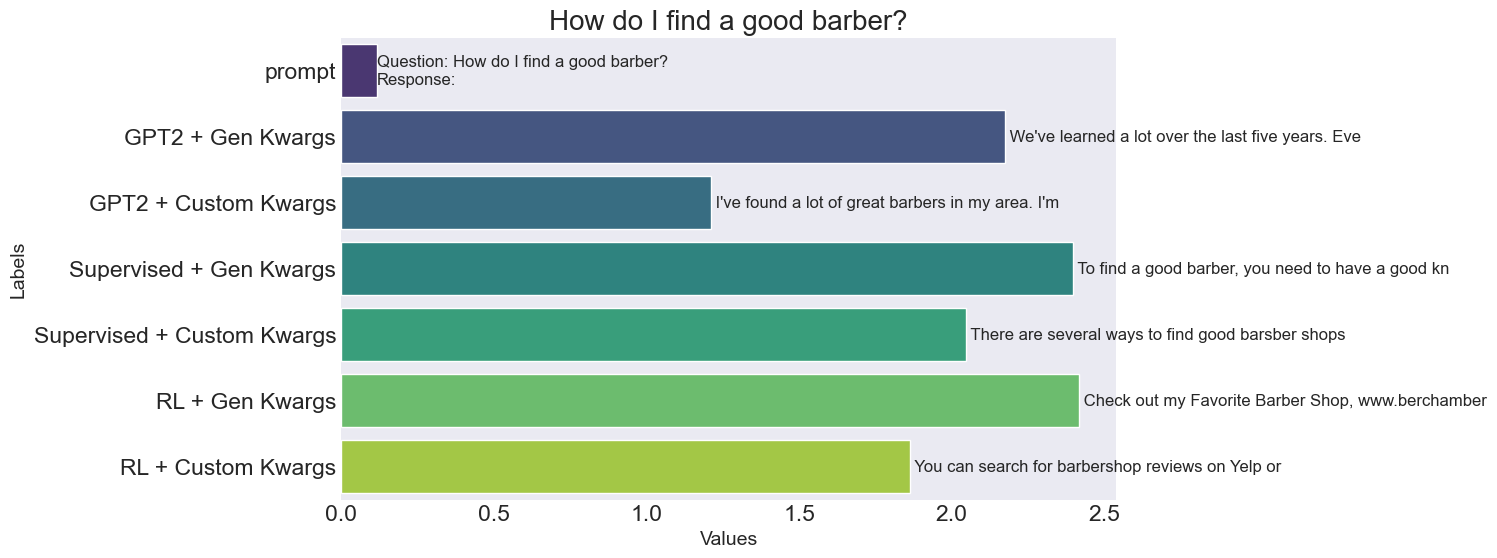

({'prompt': 'Question: How do I find a good barber?\nResponse:',
  'GPT2 + Gen Kwargs': " We've learned a lot over the last five years. Every new product they start with, we've learned a little bit of practice. We've learned a lot of different approaches to how we do each job. We've learned tons of different tips.\nThere's just always going to be a part of you that can ask and have fun and tell you so much about yourself that you'll love working at a great barber shop for years. Sometimes this is best done with a personal trainer. Others, we go through some extra steps and things we've learned to make our own. We're never too old for that, so keep an",
  'GPT2 + Custom Kwargs': " I've found a lot of great barbers in my area. I'm not sure if it's because I like to use care intake ComprehensiveOracle cleverÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂuizy bill backs resurIss Simulatorapan wobiche Tradingormonal entrantsbour superflu mayoral PittULTS careeroti Graveizza mantlesrc mighty nerv armed hating unpop CloBlu

In [23]:
test_prompt('How do I find a good barber?')